In [1]:
!pip install pycocotools pandas pillow matplotlib

In [2]:
import json
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

In [3]:
import urllib.request
import zipfile
import os
# URL of the annotation file
url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
filename = "annotations_trainval2017.zip"
# Download the ZIP file
print("Downloading COCO annotations...")
urllib.request.urlretrieve(url, filename)
print("Download complete!")
# Extract the ZIP file
with zipfile.ZipFile(filename, "r") as zip_ref:
    zip_ref.extractall("coco_annotations")
print("Extraction complete!")

# Check if the file exists
if os.path.exists("coco_annotations/annotations/instances_val2017.json"):
    print("Found instances_val2017.json")
else:
    print("File not found!")

✅ Download complete!
✅ Extraction complete!
✅ Found instances_val2017.json


In [4]:
ANNOTATION_FILE = "coco_annotations/annotations/instances_val2017.json"
IMAGE_DIR = "/files/"
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [5]:
#Extract Image Metadata
image_metadata = []

for img in coco.dataset["images"]:
    image_id = img["id"]
    file_name = img["file_name"]
    width = img["width"]
    height = img["height"]
    image_path = os.path.join(IMAGE_DIR, file_name)
    # Open image using PIL to extract format
    try:
        with Image.open(image_path) as im:
            img_format = im.format
    except:
        img_format = ".jpg"

    # Append metadata
    image_metadata.append({
        "image_id": image_id,
        "file_name": file_name,
        "width": width,
        "height": height,
        "format": img_format
    })
# Convert to DataFrame
df_metadata = pd.DataFrame(image_metadata)

In [9]:
df_metadata

,image_id,file_name,width,height,format
0,397133,000000397133.jpg,640,427,.jpg
1,37777,000000037777.jpg,352,230,.jpg
2,252219,000000252219.jpg,640,428,.jpg
3,87038,000000087038.jpg,640,480,.jpg
4,174482,000000174482.jpg,640,388,.jpg
...,...,...,...,...,...
4995,512403,000000512403.jpg,529,640,.jpg
4996,168974,000000168974.jpg,375,500,.jpg
4997,552775,000000552775.jpg,375,500,.jpg
4998,394940,000000394940.jpg,426,640,.jpg


Image Metadata Statistics:
            image_id        width       height
count    5000.000000  5000.000000  5000.000000
mean   289562.336600   573.754800   483.543000
std    167613.417537    94.003704    98.765315
min       139.000000   200.000000   145.000000
25%    147728.000000   500.000000   426.000000
50%    289590.000000   640.000000   480.000000
75%    435205.250000   640.000000   517.750000
max    581781.000000   640.000000   640.000000


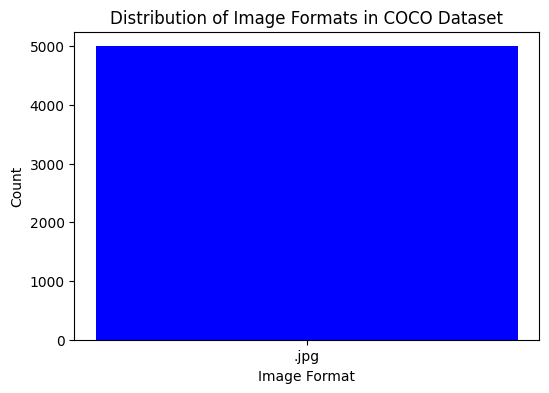

In [6]:
# Compute basic statistics
print("Image Metadata Statistics:")
print(df_metadata.describe())

# Count different image formats
format_counts = df_metadata["format"].value_counts()

# Visualize Image Format Distribution
plt.figure(figsize=(6,4))
plt.bar(format_counts.index, format_counts.values, color="blue")
plt.xlabel("Image Format")
plt.ylabel("Count")
plt.title("Distribution of Image Formats in COCO Dataset")
plt.show()